<h1 style="color:blue"><center>Analysis on BMW used car sales</center></h1>

### Student Name: Suresh Boddu <br/>
### Student ID: 0754440


<h1><center>Business Problem</center></h1>

Used cars are very much in demand in the Automobile industry.As an end user, while buying or selling a used BMW car, he/she would like to know the price based on certain features.

<h1><center>Exploratory Data Analysis</center></h1>

### Import Libraries

In [1]:
import pandas as pd
import pathlib as path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, accuracy_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from pandas import get_dummies
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


In [2]:
bmw_data = pd.read_csv("bmw.csv")

In [3]:
bmw_data.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
bmw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


 <b>Observation:</b> From the above data, no null values exists in the data.

In [5]:
bmw_data.shape

(10781, 9)

In [6]:
bmw_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


<b>Observation:</b> From the above data, for tax and enginesize has zero values.Need to replace with NAN and drop them.

In [7]:
bmw_data["engineSize"]=bmw_data["engineSize"].replace(0,np.nan)
bmw_data["tax"]=bmw_data["tax"].replace(0,np.nan)

In [8]:
bmw_data.isna().sum()

model             0
year              0
price             0
transmission      0
mileage           0
fuelType          0
tax             340
mpg               0
engineSize       47
dtype: int64

In [9]:
bmw_data.dropna( inplace = True)

In [10]:
bmw_data.shape

(10419, 9)

In [11]:
bmw_data.duplicated().sum()

117

In [12]:
bmw_data.drop_duplicates(inplace=True)

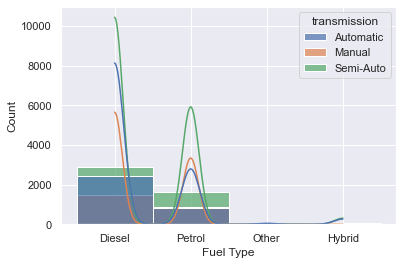

In [13]:
sns.set(style="darkgrid")
fuelvstrans=sns.histplot(bmw_data,x='fuelType',alpha = .7
            ,hue = 'transmission', kde=True)
fuelvstrans.set(xlabel='Fuel Type', ylabel='Count')
plt.show()

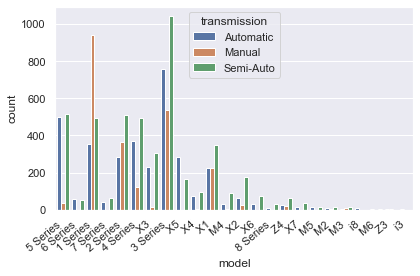

In [14]:

ax = sns.countplot(x="model", data=bmw_data,hue = 'transmission')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(rc = {'figure.figsize':(30,15)})
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='year', ylabel='Count'>

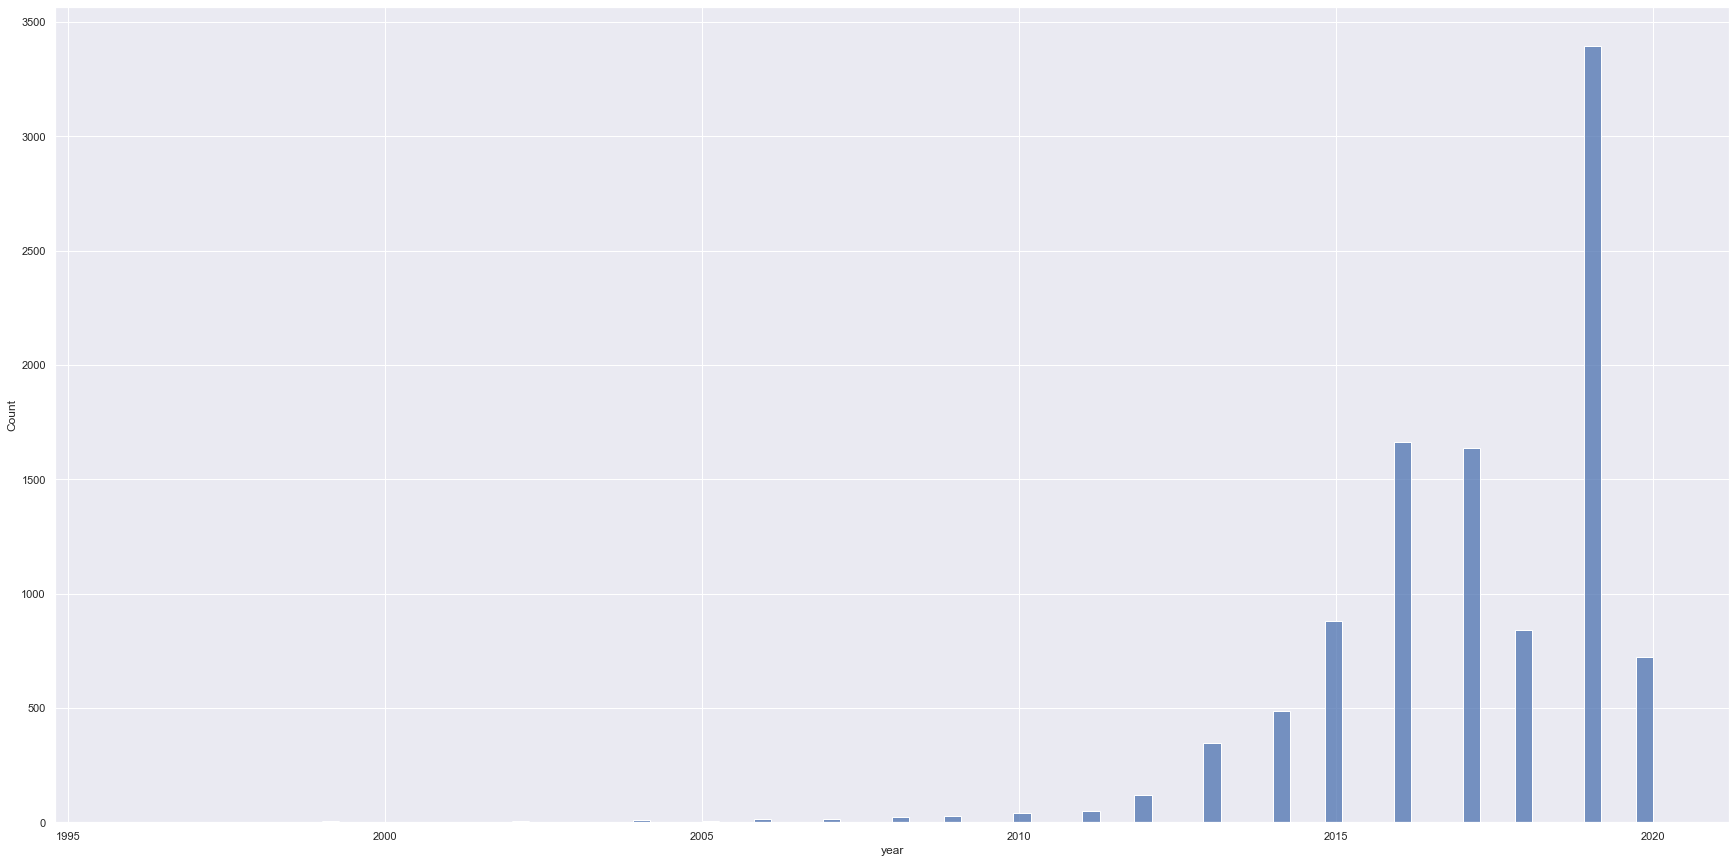

In [15]:
sns.histplot(bmw_data,x="year")

<AxesSubplot:>

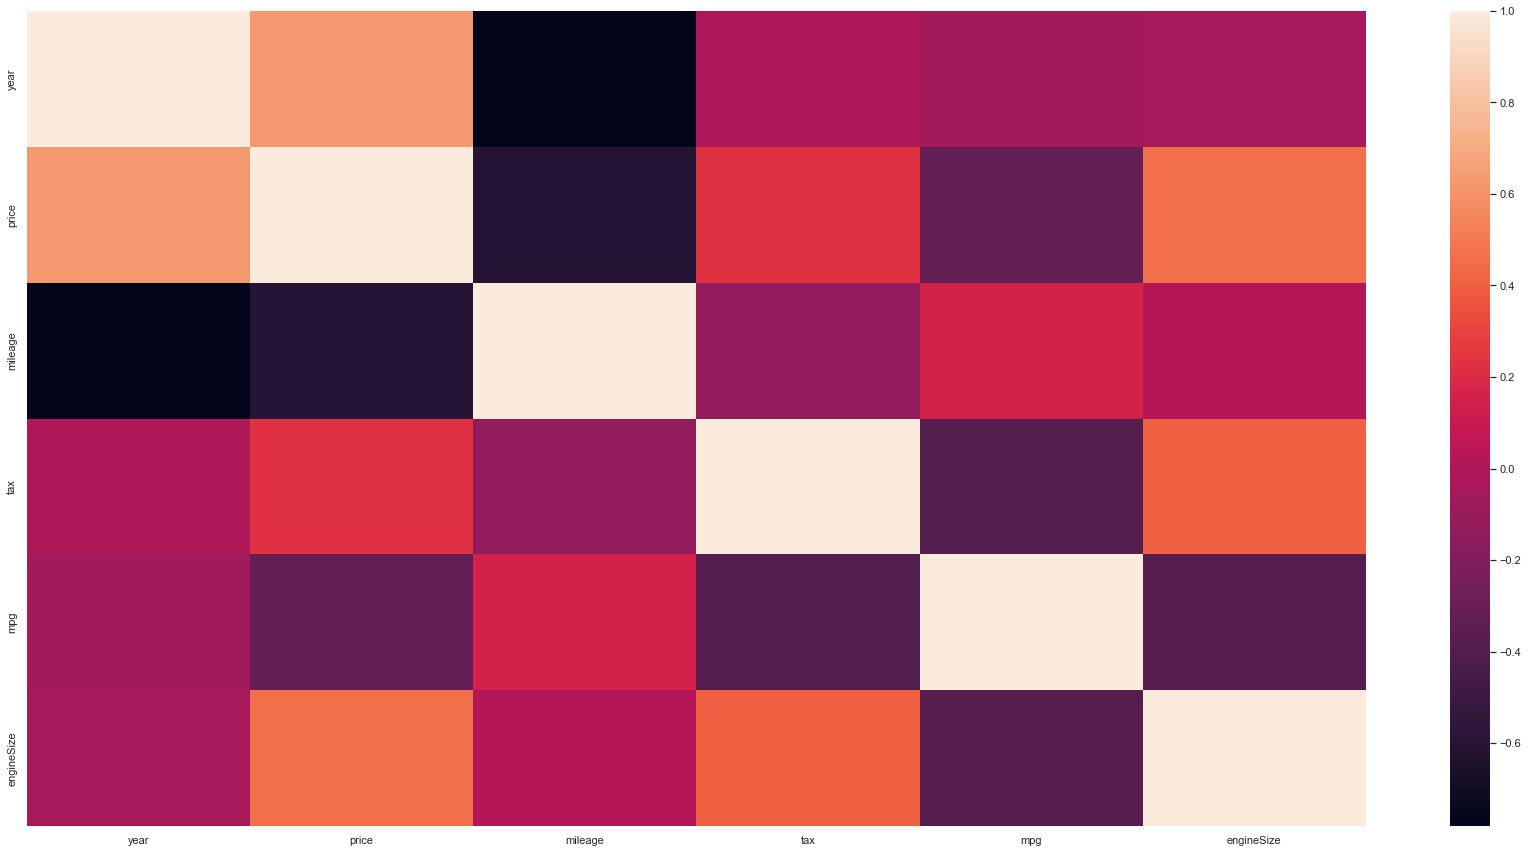

In [16]:
bmw_corr=bmw_data.corr()
sns.heatmap(bmw_corr)

In [17]:
price_corr_data = bmw_corr['price'].sort_values(ascending = False)
price_corr_data
# filtered_dep  = price_corr_data[price_corr_data > 0.02]
# filtered_dep

price         1.000000
year          0.624533
engineSize    0.462230
tax           0.234313
mpg          -0.327140
mileage      -0.604921
Name: price, dtype: float64

### Convert categorical to integer type

In [18]:
bmw_data.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125.0,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145.0,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160.0,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145.0,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160.0,50.4,3.0


#### Manually set values for transmission and fuelType features  

In [19]:
bmw_data["transmission"]=bmw_data["transmission"].map({'Semi-Auto':0,'Automatic':1,'Manual':2})
bmw_data["fuelType"]=bmw_data["fuelType"].map({'Diesel':0,'Petrol':1,'Hybrid':2,'Other':3,'Electric':4})

#### Implement one hot encoding for "model" feature 

In [20]:
dum=pd.get_dummies(bmw_data["model"],drop_first=True)
dum2=pd.DataFrame(dum,columns=dum.columns)
df=pd.concat([bmw_data,dum2],axis=1)
df.drop("model",axis=1,inplace=True)

#### Separate target feature "price" from the train dataset

In [21]:
X=df.drop("price",axis=1)
y=df["price"]

#### Split the data to a ratio of 80:20 (train_data : test_data)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)

In [23]:
X_train.shape

(8241, 30)

In [24]:
Y_train

9714    14485
4727    19950
3217    27980
8482    12405
2132    52990
        ...  
3023    13890
8067    12099
944     18998
5385    23450
255     18998
Name: price, Length: 8241, dtype: int64

<h1><center>Model Creation</center></h1>

#### Linear Regression Model

In [25]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)

X_test = scalar.fit_transform(X_test)

In [26]:



from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

In [27]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
3251,15995,22523.664699
3566,10995,6502.843162
4774,32940,30993.974002
630,15998,17067.327650
8581,11000,8322.897441
...,...,...
1636,15297,20928.422206
9983,65948,68158.621503
3462,26980,32742.010848
6370,28260,28709.284906


In [28]:
y_pred

array([22523.66469943,  6502.84316188, 30993.97400167, ...,
       32742.01084752, 28709.28490585,  9997.44032157])

In [29]:
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test,y_pred)
r2_score
print(r2_score*100,'%')

77.16695203147783 %


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rfc = RandomForestRegressor(n_estimators=10, random_state=0)
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
rfc_mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error (MAE): ",rfc_mae)

Mean Absolute Error (MAE):  3796.590918070285


[Text(0.5, 1.0, 'Actual Price vs. Prediction')]

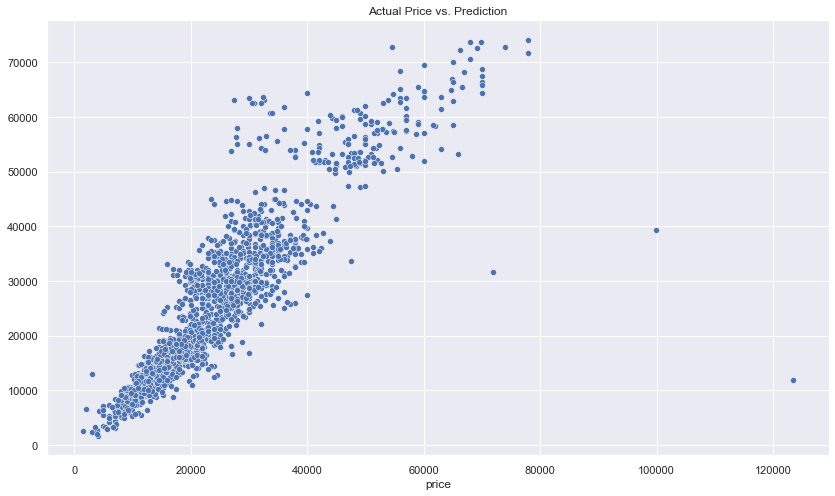

In [34]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=Y_test, y=y_pred).set(title='Actual Price vs. Prediction')

#### Observation :

The evaluated MAE (Mean Absolute Error) of 3,797 Euros is considerably not so bad for an average price of 23,000 Euros.From the above scatter plot, it is similar to a straight line with a little bit of spread.And a few high priced data points are off which are going away the averrage error.